# Emotion-Recognition-through-speech

# -VIVISHA SINGH

# Mask/ Cleaning of Data : The down sampling of the voices would be done and the masking process would be undergone as to clean the data. Here, Cleaning the data means to reduce the unwanted noises in the audio file. This method is termed as Mask. After the Masking is done, the data would be directed into a clean folder for later use. 

# Install all the Reqiuired Libraries and Packages

In [2]:
! pip install python_speech_features

  Using cached python_speech_features-0.6.tar.gz (5.6 kB)
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5887 sha256=ac66e64968ef70f32ef8db5a5fae6fb060e7ce44a27f607d4963c60c7ea53d8d
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b0\0e\94\28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [4]:
! pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=f4e12ec3435427991a2705b48353ca962d9841ab716d6576bc356cbdba8d379e
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\ba\7b\eb\213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=d23df0e65014067a8e47f0026163e5ec7aa86ff0abe4bfec326d8eee659d002a
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\a0\18\0a\8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built audioread resampy


In [6]:
! pip install noisereduce

  Created wheel for noisereduce: filename=noisereduce-1.1.0-py3-none-any.whl size=7608 sha256=4495b50659546ee3ccf61bc8ffc5eaf89c04bb2e57cb211f55ce6b5ba694192d
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\a9\c4\ff\0fb026d7d556975fd4afc7b061571d50e0a2eba82d2c56f073
Successfully built noisereduce


In [8]:
! pip install np_utils

In [12]:
! pip install tensorflow

In [13]:
import os
import glob
from tqdm.autonotebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
get_ipython().magic('matplotlib inline')
#All the Required Packages and Libraies are installed.
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:

#Loading the required RAVDESS DataSet with length of 1439 Audio Files 
os.listdir(path='C:\\Users\\LENOVO\\Downloads\\archive')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = 'C:\\Users\\LENOVO\\Downloads\\archive'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)


2880

In [29]:
! pip install SpeechRecognition

In [30]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

talking by the door
kids talking by the door
dogs sitting by the door
talk to Siri why the door
error
talking by the door
by the door
dogs sitting by the door
change your talking by the door
kids are talking by the door
dog sitting by the door
sitting by the door
kids talking by the door
talking by the door
dogs sitting by the door
dogs are sitting by the door
talking by the door
error
sitting by the door
dogs are sitting by the door
kids talking by the door
khesa talking by the door
sitting by the door
error
kids are talking by the door
talking by the door
dogs are sitting by the door
sitting by the door
kids or talking by the door
a talking by the door
sitting by the door
sitting by the door
talking by the door
Earth talking by the door
dogs are sitting by the door
spelling for the tour
talking by the door
kids talking by the door
toxicity by the door
dogs sitting by the door
f****** by the door
is the talking to the door
Rockstar ceiling by the door
ceiling by the
by the door
error


In [32]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

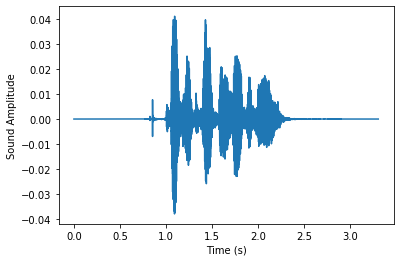

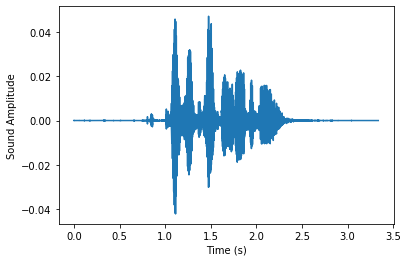

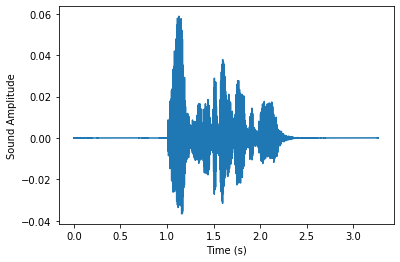

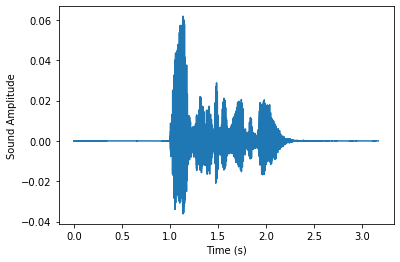

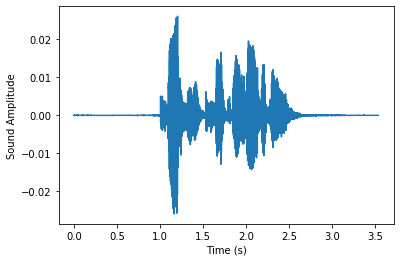

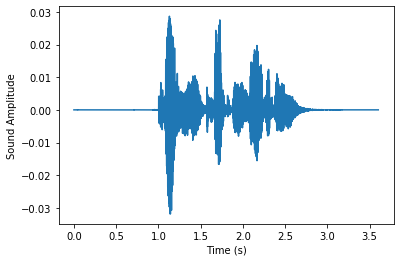

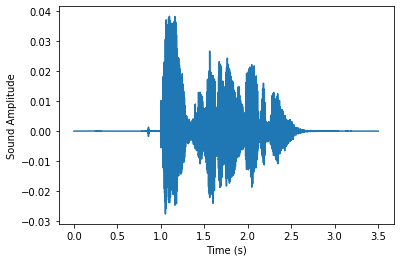

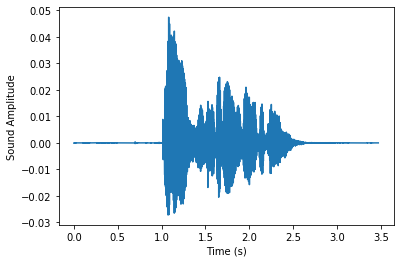

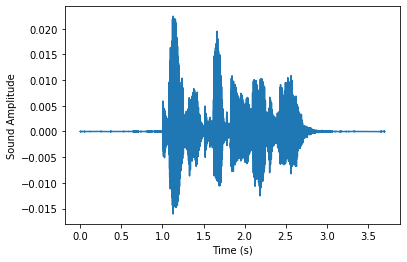

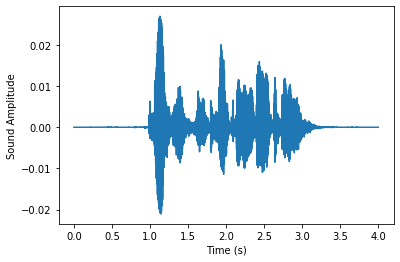

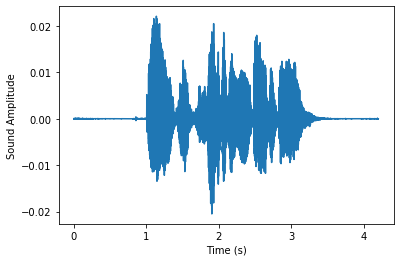

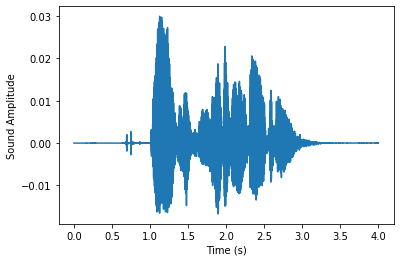

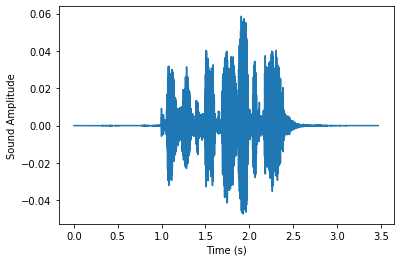

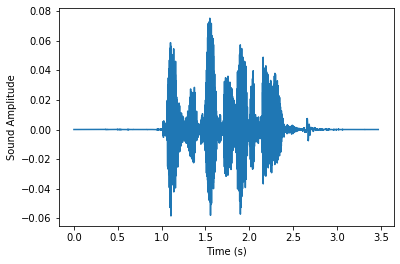

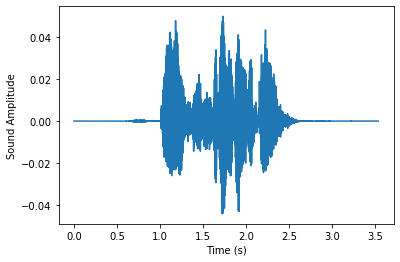

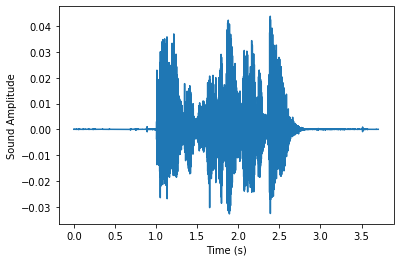

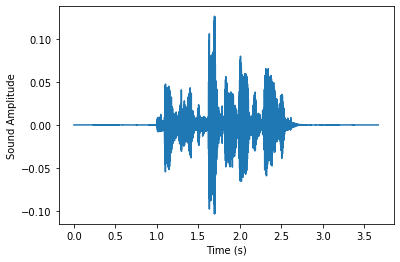

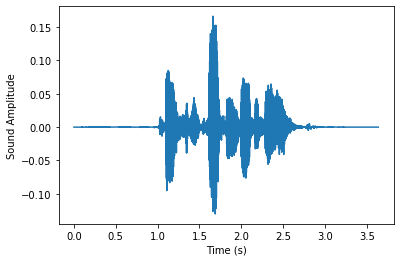

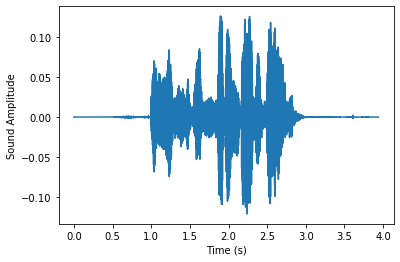

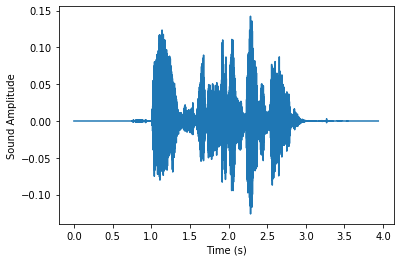

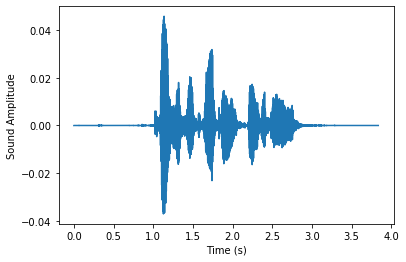

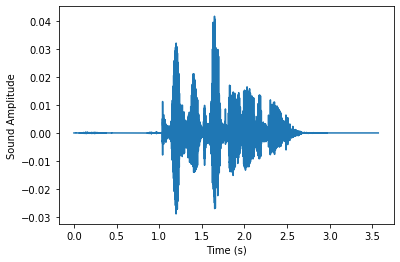

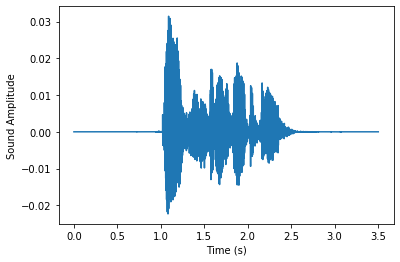

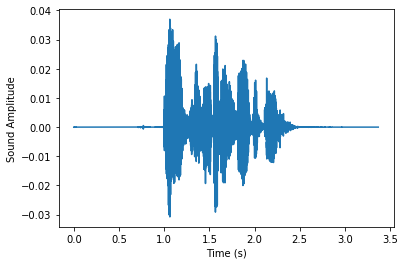

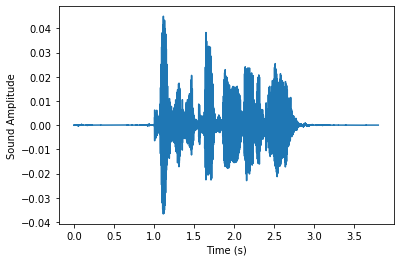

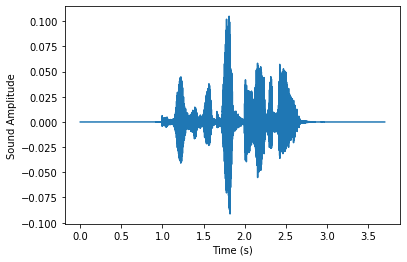

KeyboardInterrupt: 

In [34]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()
        
        